<a href="https://colab.research.google.com/github/YenLinWu/Daily_Work_of_Data_Science/blob/Dev/Introduction_to_Feature_Transformation_and_Extraction/Feature_Transformation_and_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特徵分箱 Feature Binning

## 等距分箱與等頻分箱

### 載入套件

In [75]:
!pip install --upgrade kagglehub

In [81]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import kagglehub

print('Python Version:', sys.version[0:7])
print('Numpy Version:', np.__version__ )
print('Pandas Version:', pd.__version__ )
print('Matplotlib Version:', matplotlib.__version__)
print('Kagglehub Version:', kagglehub.__version__)

Python Version: 3.11.11
Numpy Version: 1.26.4
Pandas Version: 2.2.2
Matplotlib Version: 3.10.0
Kagglehub Version: 0.3.9


### 下載與讀取資料  

- 資料來源 : [Wine Quality](https://www.kaggle.com/datasets/joebeachcapital/wine-quality?resource=download)

In [77]:
# 下載資料集 from Kagglehub
path = kagglehub.dataset_download('joebeachcapital/wine-quality')
print('Path to dataset files:', path)

# 讀取紅酒與白酒資料集
file_path_of_winequality_red = os.path.join(path, 'winequality-red.csv')
file_path_of_winequality_white = os.path.join(path, 'winequality-white.csv')
winequality_red = pd.read_csv(file_path_of_winequality_red, sep=';')
winequality_white = pd.read_csv(file_path_of_winequality_white, sep=';')
print('Shape of Red Wine Quality =', winequality_red.shape)
print('Shape of White Wine Quality =', winequality_white.shape)

# 縱向連接兩資料集
wine_data = pd.concat([winequality_red, winequality_white], ignore_index=True)
print('Shape of Red and White Wine Quality =', wine_data.shape)

# 目標變數名稱 Target Name
y_name = 'quality'

# 特徵變數名稱 Feature Names
X_names = [x for x in wine_data.columns.values if x not in  [y_name]]

print('Target Name =', y_name)
print('Feature Names =', X_names)
wine_data.head()

Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/wine-quality/versions/1
Shape of Red Wine Quality = (1599, 12)
Shape of White Wine Quality = (4898, 12)
Shape of Red and White Wine Quality = (6497, 12)
Target Name = quality
Feature Names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


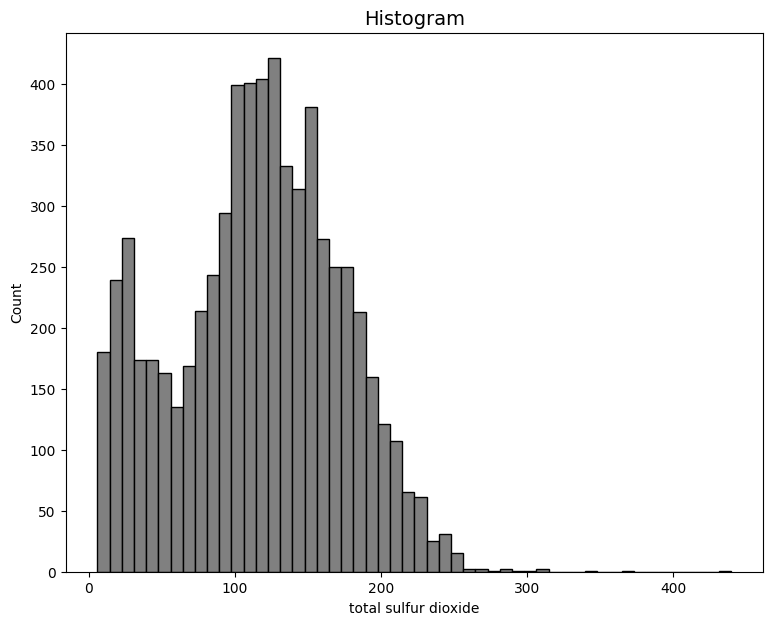

In [82]:
# 選擇特徵變數
total_sulfur_dioxide = wine_data['total sulfur dioxide']

# 特徵變數的分布
plt.figure(figsize=(9, 7))
plt.hist(total_sulfur_dioxide, bins='auto', density=False, color='gray', edgecolor='black')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Count')
plt.title('Histogram', fontsize=14)

plt.savefig('histogram_of_total_sulfur_dioxide.png', bbox_inches='tight', format='png')

plt.show()

### 等距分箱

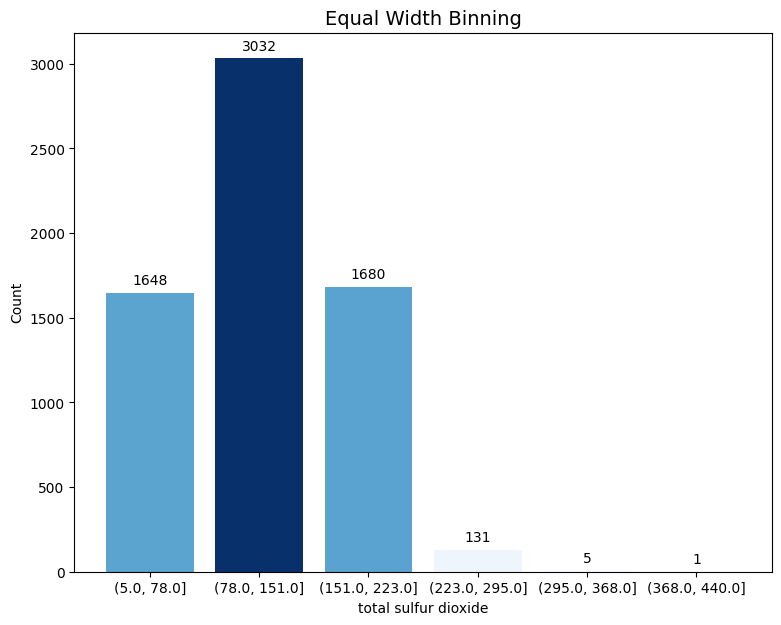

In [79]:
bins = 6

# 等距分箱
binning_feature = pd.cut(total_sulfur_dioxide, bins=bins, precision=0, include_lowest=True)
binning_feature = pd.DataFrame(binning_feature)
binning_feature.columns = ['bin_width']
binning_feature.reset_index(inplace=True)

# 統計每一個帶寬的資料筆數
pivot_table = pd.pivot_table(binning_feature, index='bin_width',
                             values='index', aggfunc='count', observed=False)
pivot_table.columns = ['count']
pivot_table.reset_index(inplace=True)
pivot_table['bin_width'] = pivot_table['bin_width'].astype(str)

# 直條圖
plt.figure(figsize=(9, 7))
colors = plt.cm.Blues(pivot_table['count']/pivot_table['count'].max())
plt.bar(list(pivot_table['bin_width']), list(pivot_table['count']), color=colors)
for i, v in enumerate(pivot_table['count']):
    plt.text(i, v+50, str(v), ha='center', fontsize=10, color='black')

plt.xlabel('total sulfur dioxide')
plt.ylabel('Count')
plt.title('Equal Width Binning', fontsize=14)

plt.savefig('equal_width_binning.png', bbox_inches='tight', format='png')

plt.show()

### 等頻分箱

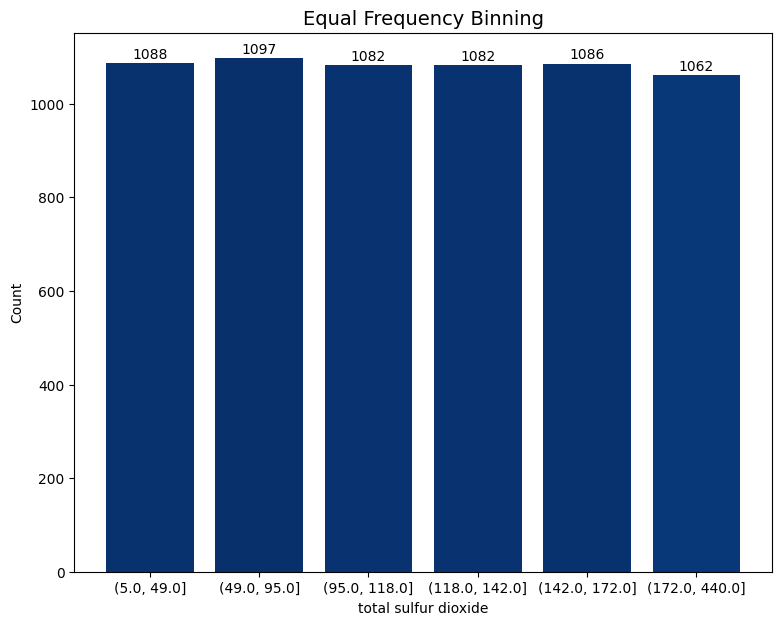

In [80]:
# 等頻分箱
binning_feature = pd.qcut(total_sulfur_dioxide, 6, precision=0, duplicates='raise')
binning_feature = pd.DataFrame(binning_feature)
binning_feature.columns = ['bin_width']
binning_feature.reset_index(inplace=True)

# 統計每一個帶寬的資料筆數
pivot_table = pd.pivot_table(binning_feature, index='bin_width',
                             values='index', aggfunc='count', observed=False)
pivot_table.columns = ['count']
pivot_table.reset_index(inplace=True)
pivot_table['bin_width'] = pivot_table['bin_width'].astype(str)

# 直條圖
plt.figure(figsize=(9, 7))
colors = plt.cm.Blues(pivot_table['count']/pivot_table['count'].max())
plt.bar(list(pivot_table['bin_width']), list(pivot_table['count']), color=colors)
for i, v in enumerate(pivot_table['count']):
    plt.text(i, v+10, str(v), ha='center', fontsize=10, color='black')

plt.xlabel('total sulfur dioxide')
plt.ylabel('Count')
plt.title('Equal Frequency Binning', fontsize=14)

plt.savefig('equal_frequency_binning.png', bbox_inches='tight', format='png')

plt.show()

## 【實務案例】利用分箱尋找隱性的差異

### 載入套件

In [63]:
import sys
import os

import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print('Python Version:', sys.version[0:7])
print('Numpy Version:', np.__version__ )
print('Pandas Version:', pd.__version__ )
print('SciPy Version:', scipy.__version__)
print('Matplotlib Version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)

Python Version: 3.11.11
Numpy Version: 1.26.4
Pandas Version: 2.2.2
SciPy Version: 1.13.1
Matplotlib Version: 3.10.0
Seaborn version: 0.13.2


### 讀取資料

In [64]:
# 讀取資料
sample_data = pd.read_excel('./sample_data_for_feature_binning.xlsx')

# 定義特徵變數與目標變數
feature = 'Current'
target = 'Target'

### 特徵變數與目標變數的關係

In [65]:
# 相關係數
corr_matrix = sample_data.corr(method='pearson' ,numeric_only=True)
corr_matrix

,Current,Target
Current,1.000000,-0.241875
Target,-0.241875,1.000000


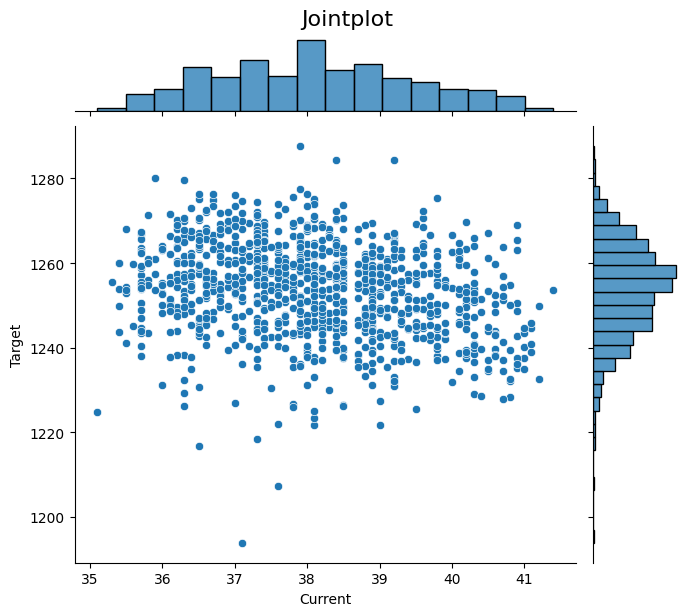

In [66]:
# 繪製特徵變數與目標變數的散布圖
g = sns.jointplot(data=sample_data, x=feature, y=target, kind='scatter')
g.fig.set_size_inches(7, 6)
plt.suptitle('Jointplot', size=16, y=1.02)

plt.savefig('jointplot_of_feature_and_target.png', bbox_inches='tight', format='png')

plt.show()

### 特徵分箱 : 自定義分箱

In [67]:
# 自定義分箱
min_ = sample_data[feature].min()
max_ = sample_data[feature].max()
bin_rule = [min_, 36, 39, max_]
bin_label = list(range(len(bin_rule)-1))

# 特徵分箱
data_after_binning = pd.DataFrame()
data_after_binning[feature] = sample_data[feature]
data_after_binning[target] = sample_data[target]
data_after_binning['Group'] = pd.cut(sample_data[feature], bin_rule, include_lowest=False)
data_after_binning['Group'] = data_after_binning['Group'].astype(str)
data_after_binning['Group Label'] = pd.cut(sample_data[feature], bin_rule, include_lowest=False, labels=bin_label)
data_after_binning

,Current,Target,Group,Group Label
0,40.3,1240.87500,"(39.0, 41.4]",2
1,40.5,1234.40625,"(39.0, 41.4]",2
2,40.9,1235.09375,"(39.0, 41.4]",2
3,40.6,1244.03125,"(39.0, 41.4]",2
4,38.9,1239.37500,"(36.0, 39.0]",1
...,...,...,...,...
991,36.5,1216.75000,"(36.0, 39.0]",1
992,37.3,1218.31250,"(36.0, 39.0]",1
993,39.0,1221.68750,"(36.0, 39.0]",1
994,38.5,1226.25000,"(36.0, 39.0]",1


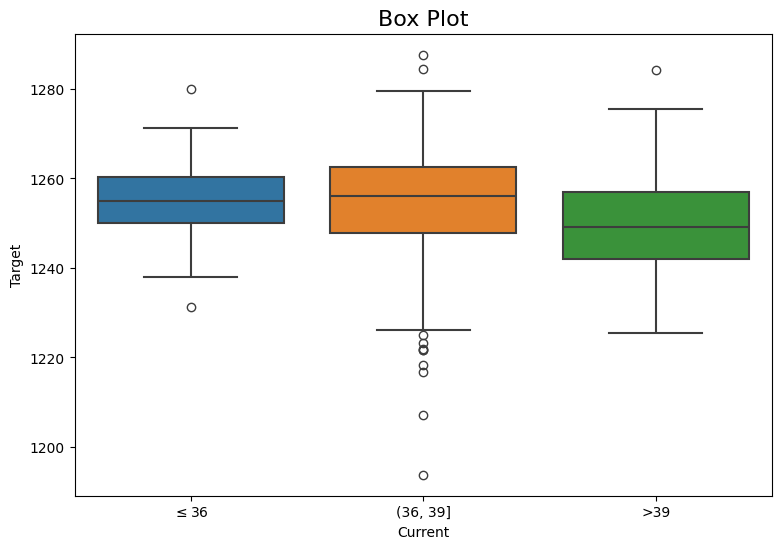

In [69]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=data_after_binning, x='Group Label', y=target, hue='Group Label',
            legend=False, linewidth=1.5)
plt.title('Box Plot', size=16)
plt.xlabel(feature)
plt.ylabel(target)
plt.xticks(ticks=list(range(len(bin_rule)-1)), labels=['$\leq36$', '(36, 39]', '>39'])

plt.savefig('boxplot_after_feature_binning.png', bbox_inches='tight', format='png')
plt.show()

### 統計檢定分箱後的差異性

In [70]:
group_1 = data_after_binning[data_after_binning['Group Label']==0][target]
group_2 = data_after_binning[data_after_binning['Group Label']==1][target]
group_3 = data_after_binning[data_after_binning['Group Label']==2][target]

In [71]:
print('使用 Brown-Forsythe Test，檢定多個組別的變異數是否相等:')
statistic, p_value = scipy.stats.levene(group_1, group_2, group_3, center='mean')
if p_value < 0.05:
    print("推論: 拒絕虛無假設，所有組別的變異數不完全相等。\n")
else:
    print("推論: 接受虛無假設，所有組別的變異數相等。\n")

# Kruskal-Wallis 檢定
# A Kruskal-Wallis Test is used to determine whether or not there is a statistically significant difference
# between the medians of three or more independent groups.
# The null hypothesis: The median is equal across all groups.
# The alternative hypothesis: The median is not equal across all groups.
print('使用 Kruskal-Wallis Test，檢定多個組別的中位數是否相等:')
statistic, p_value = scipy.stats.kruskal(group_1, group_2, group_3)
if p_value < 0.05:
    print("推論: 拒絕虛無假設，所有組別的中位數不完全相等。\n")
else:
    print("推論: 接受虛無假設，所有組別的中位數相等。\n")

使用 Brown-Forsythe Test，檢定多個組別的變異數是否相等:
推論: 接受虛無假設，所有組別的變異數相等。

使用 Kruskal-Wallis Test，檢定多個組別的中位數是否相等:
推論: 拒絕虛無假設，所有組別的中位數不完全相等。



# 特徵縮放 Feature Scaling

In [72]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler

print('Python Version:', sys.version[0:7])
print('Numpy Version:', np.__version__ )
print('Pandas Version:', pd.__version__ )
print('Matplotlib Version:', matplotlib.__version__)
print('Scikit-Learn Version:', sklearn.__version__)

Python Version: 3.11.11
Numpy Version: 1.26.4
Pandas Version: 2.2.2
Matplotlib Version: 3.10.0
Scikit-Learn Version: 1.6.1


## 最小最大縮放  



### 離群值的影響

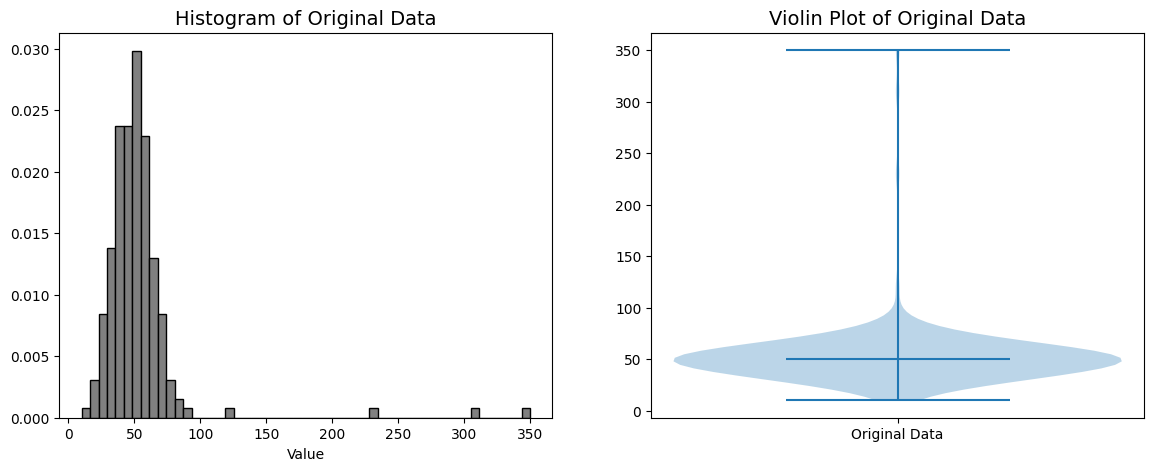

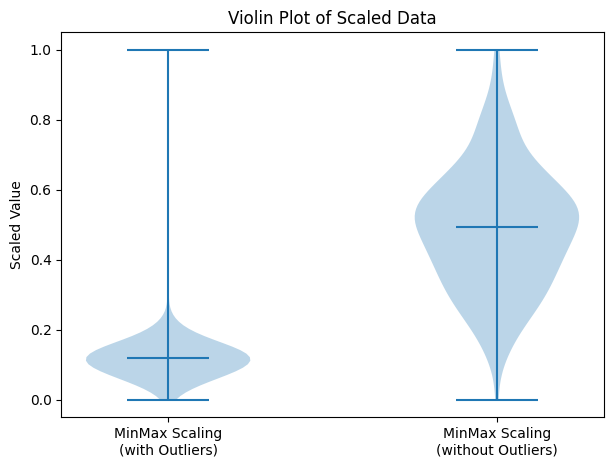

In [73]:
# 生成虛擬的資料
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=200).astype(int)
data_with_outlier = np.concatenate([data, [120, 230, 310, 350]])

# 原始資料分布(存在離群值)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(data_with_outlier, bins='auto', density=True, color='gray', edgecolor='black')
plt.title('Histogram of Original Data', fontsize=14)
plt.xlabel('Value')

plt.subplot(1, 2, 2)
plt.violinplot(data_with_outlier, showmedians=True)
plt.xticks([1], ['Original Data'])
plt.title('Violin Plot of Original Data', fontsize=14)

plt.savefig('original_data_distribution.png', bbox_inches='tight', format='png')
plt.show()
print('\n================================================\n')

# 最小最大縮放
scaler = MinMaxScaler()
minmax_scaled_data_with_outlier = scaler.fit_transform(data_with_outlier.reshape(-1, 1)).ravel()

# 最小最大縮放(排除離群值)
minmax_scaled_data_without_outlier = scaler.fit_transform(data.reshape(-1, 1)).ravel()

# 小提琴圖 Violin Plot
plt.figure(figsize=(7, 5))
plt.violinplot([minmax_scaled_data_with_outlier, minmax_scaled_data_without_outlier], showmedians=True)
plt.xticks([1, 2], ['MinMax Scaling\n(with Outliers)', 'MinMax Scaling\n(without Outliers)'])
plt.ylabel('Scaled Value')
plt.title('Violin Plot of Scaled Data')

plt.savefig('violin_plot_of_scaled_data.png', bbox_inches='tight', format='png')

plt.show()

## 最大絕對縮放

### 稀疏數據的縮放

- 「最小最大縮放」與「最大絕對縮放」的比較

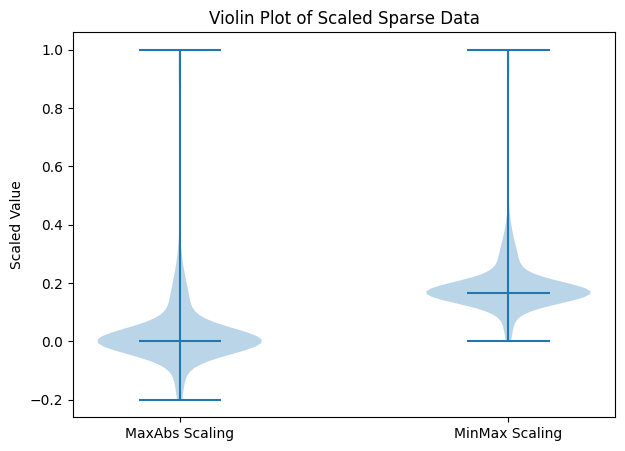

In [8]:
# 生成虛擬的稀疏數據
np.random.seed(42)
sample_size = 300
sparsity_ratio = 0.6
sparse_data = np.zeros(sample_size)

non_zero_indices = np.random.choice(range(sample_size), size=int((1-sparsity_ratio)*sample_size), replace=False)
# sparse_data[non_zero_indices] = np.random.uniform(-15, 15, size=len(non_zero_indices)).astype(int)
sparse_data[non_zero_indices] = np.random.normal(loc=1, scale=5, size=len(non_zero_indices)).astype(int)
sparse_data_with_outlier = np.concatenate([sparse_data, [30, 37, 35, 38, 40]])

# 最大絕對縮放
scaler = MaxAbsScaler()
maxabs_scaled_data_with_outlier = scaler.fit_transform(sparse_data_with_outlier.reshape(-1, 1)).ravel()

# 最小最大縮放
scaler = MinMaxScaler()
minmax_scaled_data_with_outlier = scaler.fit_transform(sparse_data_with_outlier.reshape(-1, 1)).ravel()

# 小提琴圖 Violin Plot
plt.figure(figsize=(7, 5))
plt.violinplot([maxabs_scaled_data_with_outlier, minmax_scaled_data_with_outlier], showmedians=True)
plt.xticks([1, 2], ['MaxAbs Scaling', 'MinMax Scaling'])
plt.ylabel('Scaled Value')
plt.title('Violin Plot of Scaled Sparse Data')

plt.savefig('violin_plot_of_scaled_sparse_data_in_MaxAbs_and_MinMax.png', bbox_inches='tight', format='png')

plt.show()

### 離群值的影響

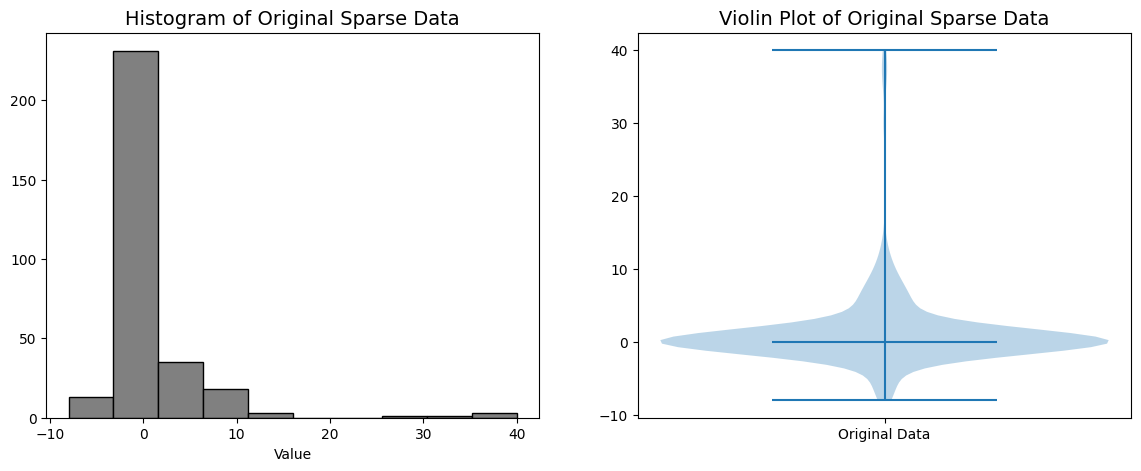

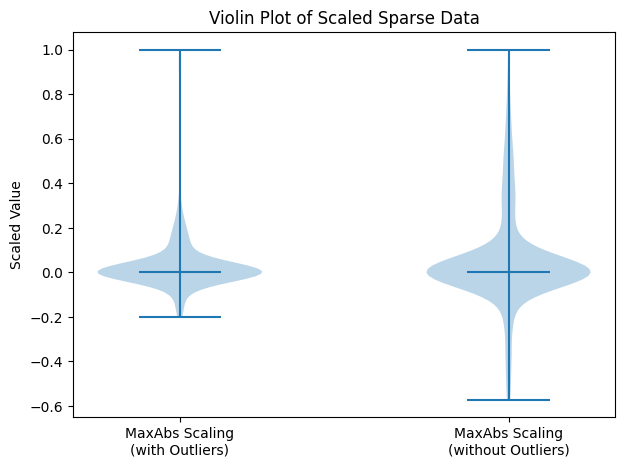

In [74]:
# 生成虛擬的稀疏數據
np.random.seed(42)
sample_size = 300
sparsity_ratio = 0.6
sparse_data = np.zeros(sample_size)

non_zero_indices = np.random.choice(range(sample_size), size=int((1-sparsity_ratio)*sample_size), replace=False)
sparse_data[non_zero_indices] = np.random.normal(loc=1, scale=5, size=len(non_zero_indices)).astype(int)
sparse_data_with_outlier = np.concatenate([sparse_data, [30, 37, 35, 38, 40]])

# 原始資料分布(存在離群值)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(sparse_data_with_outlier, bins='auto', density=False, color='gray', edgecolor='black')
plt.title('Histogram of Original Sparse Data', fontsize=14)
plt.xlabel('Value')

plt.subplot(1, 2, 2)
plt.violinplot(sparse_data_with_outlier, showmedians=True)
plt.xticks([1], ['Original Data'])
plt.title('Violin Plot of Original Sparse Data', fontsize=14)

plt.savefig('original_sparse_data_distribution.png', bbox_inches='tight', format='png')
plt.show()
print('\n================================================\n')

# 最大絕對縮放
scaler = MaxAbsScaler()
maxabs_scaled_data_with_outlier = scaler.fit_transform(sparse_data_with_outlier.reshape(-1, 1)).ravel()

# 最大絕對縮放(排除離群值)
maxabs_scaled_data_without_outlier = scaler.fit_transform(sparse_data.reshape(-1, 1)).ravel()

# 小提琴圖 Violin Plot
plt.figure(figsize=(7, 5))
plt.violinplot([maxabs_scaled_data_with_outlier, maxabs_scaled_data_without_outlier], showmedians=True)
# plt.ylim([-0.5, 1])
plt.xticks([1, 2], ['MaxAbs Scaling\n(with Outliers)', 'MaxAbs Scaling\n(without Outliers)'])
# plt.xlabel('Scaling Method')
plt.ylabel('Scaled Value')
plt.title('Violin Plot of Scaled Sparse Data')

plt.savefig('violin_plot_of_scaled_sparse_data.png', bbox_inches='tight', format='png')

plt.show()

# 主成份分析 PCA

## 【範例】Wine Quality

### 載入套件

In [1]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.7
    Uninstalling kagglehub-0.3.7:
      Successfully uninstalled kagglehub-0.3.7


In [9]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kagglehub

print('Python Version:', sys.version[0:7])
print('Numpy Version:', np.__version__ )
print('Pandas Version:', pd.__version__ )
print('Matplotlib Version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('Scikit-Learn Version:', sklearn.__version__)
print('Kagglehub Version:', kagglehub.__version__)

Python Version: 3.11.11
Numpy Version: 1.26.4
Pandas Version: 2.2.2
Matplotlib Version: 3.10.0
Seaborn version: 0.13.2
Scikit-Learn Version: 1.6.1
Kagglehub Version: 0.3.9


### 下載與讀取資料   

- 資料來源 : [Wine Quality](https://www.kaggle.com/datasets/joebeachcapital/wine-quality/data)

In [6]:
# 下載資料集 from Kagglehub
path = kagglehub.dataset_download('joebeachcapital/wine-quality')
print('Path to dataset files:', path)

# 讀取紅酒與白酒資料集
file_path_of_winequality_red = os.path.join(path, 'winequality-red.csv')
file_path_of_winequality_white = os.path.join(path, 'winequality-white.csv')
winequality_red = pd.read_csv(file_path_of_winequality_red, sep=';')
winequality_white = pd.read_csv(file_path_of_winequality_white, sep=';')
print('Shape of Red Wine Quality =', winequality_red.shape)
print('Shape of White Wine Quality =', winequality_white.shape)

# 縱向連接兩資料集
wine_data = pd.concat([winequality_red, winequality_white], ignore_index=True)
print('Shape of Red and White Wine Quality =', wine_data.shape)

# 目標變數名稱 Target Name
y_name = 'quality'

# 特徵變數名稱 Feature Names
X_names = [x for x in wine_data.columns.values if x not in  [y_name]]

print('Target Name =', y_name)
print('Feature Names =', X_names)
wine_data.head()

100%|██████████| 97.1k/97.1k [00:00<00:00, 36.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/wine-quality/versions/1
Shape of Red Wine Quality = (1599, 12)
Shape of White Wine Quality = (4898, 12)
Shape of Red and White Wine Quality = (6497, 12)
Target Name = quality
Feature Names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 特徵變數的分布

In [7]:
# 定義特徵變數與目標變數
X = wine_data[X_names]
y = wine_data[y_name]

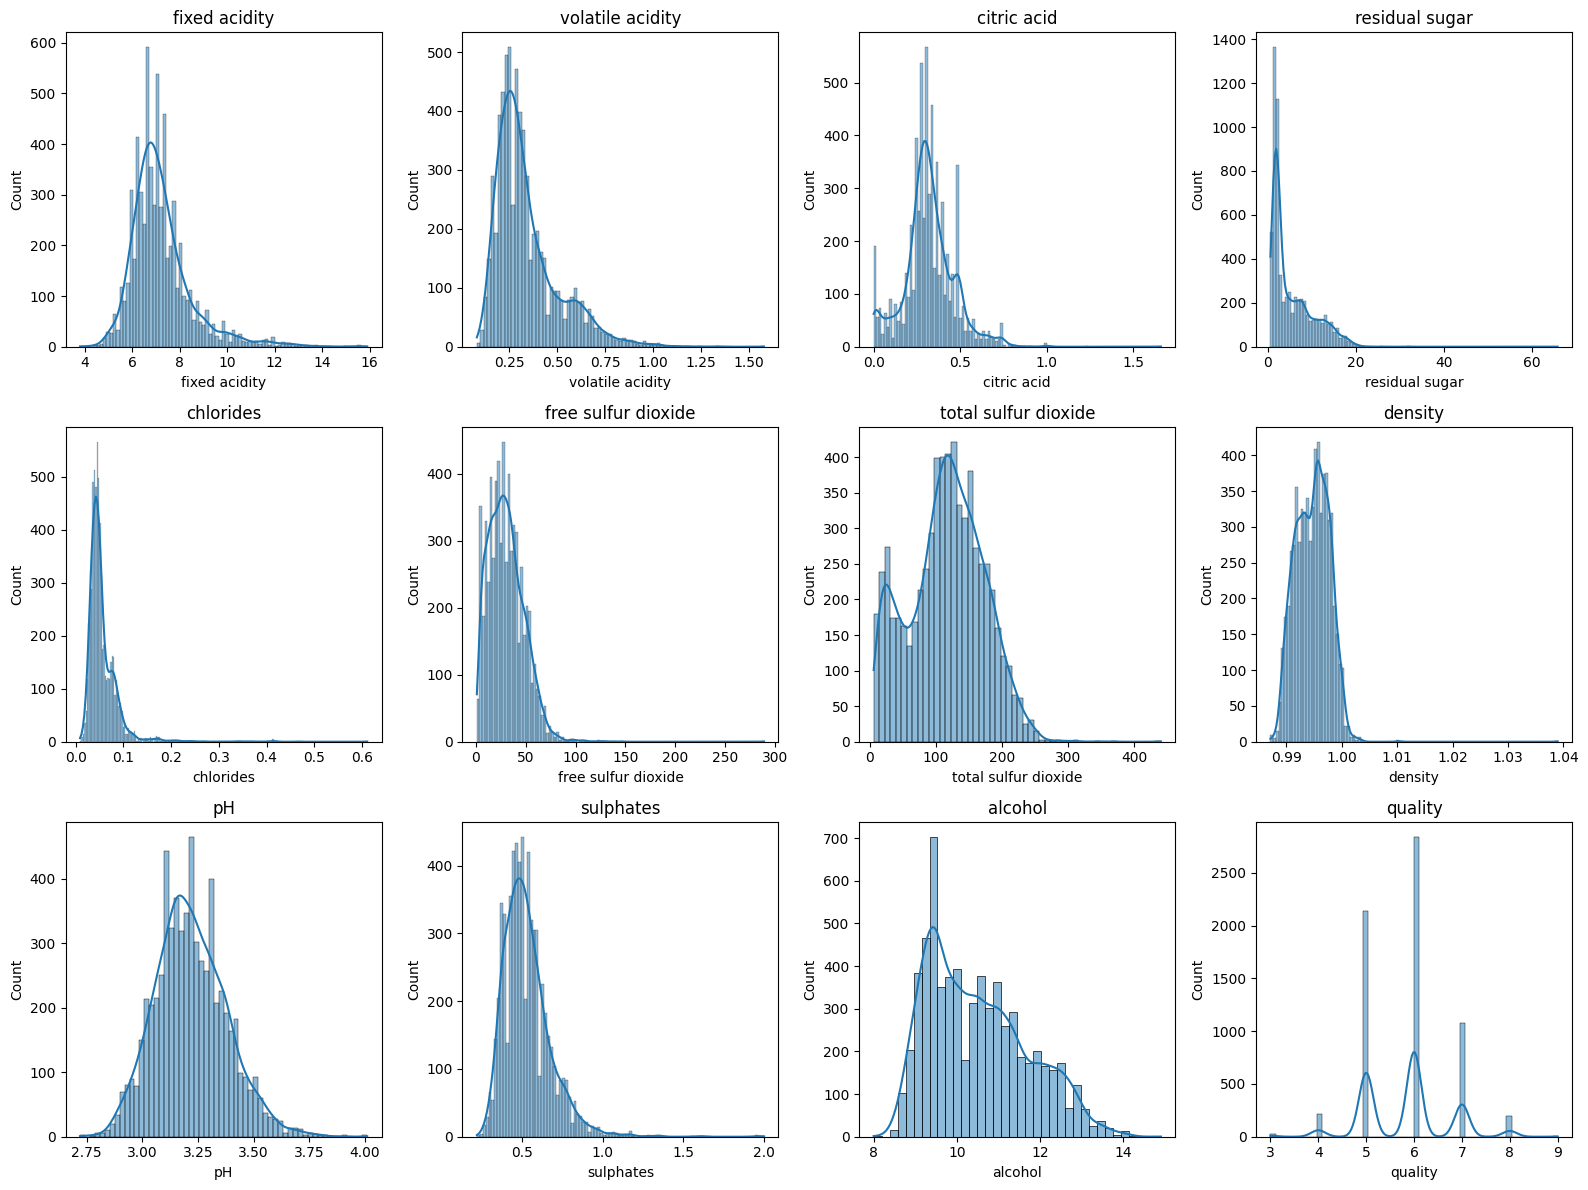

In [22]:
# 設定圖表排版
num_features = len(wine_data.columns)
fig_cols = 4
fig_rows = (num_features+fig_cols-1)//fig_cols

# 繪製每個特徵變數的分布圖
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(16, 4*fig_rows))
axes = axes.flatten()

for i, col in enumerate(wine_data.columns):
    sns.histplot(wine_data[col], kde=True, ax=axes[i], bins='auto')
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('histogram_of_features.png', bbox_inches='tight', format='png')
plt.show()

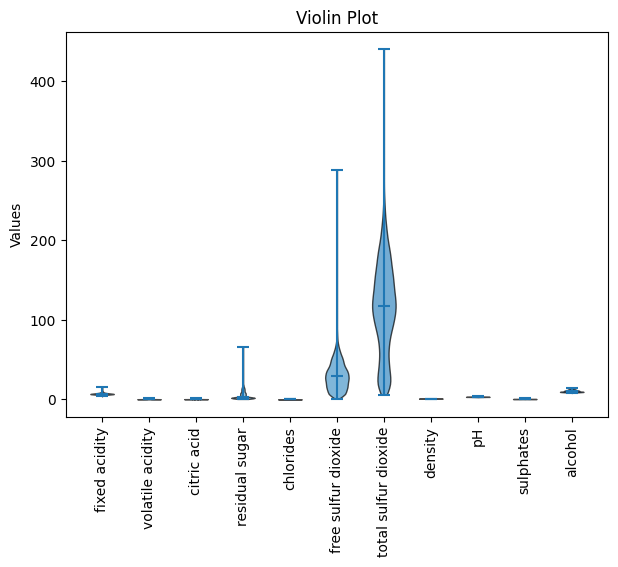

In [20]:
# 繪製各特徵變數的小提琴圖
plt.figure(figsize=(7, 5))
positions = range(len(X.columns))
parts = plt.violinplot(X.values, positions=positions, vert=True, showmeans=False, showmedians=True)

# 設定顏色漸層
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(X.columns)))
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

plt.xticks(positions, X.columns, rotation=90)
plt.ylabel('Values')
plt.title('Violin Plot')

plt.savefig('violin_plot_of_features.png', bbox_inches='tight', format='png')

plt.show()

### 主成份分析

In [38]:
# 標準化特徵
scaler = StandardScaler().set_output(transform='pandas')
scaled_X = scaler.fit_transform(X)

# 主成份分析: 特徵無標準化、特徵有經標準化
pca = PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X)

# 原始特徵轉換成主成份所構成的空間中
X_transformed = pca.transform(X)
X_std_transformed = scaled_pca.transform(scaled_X)

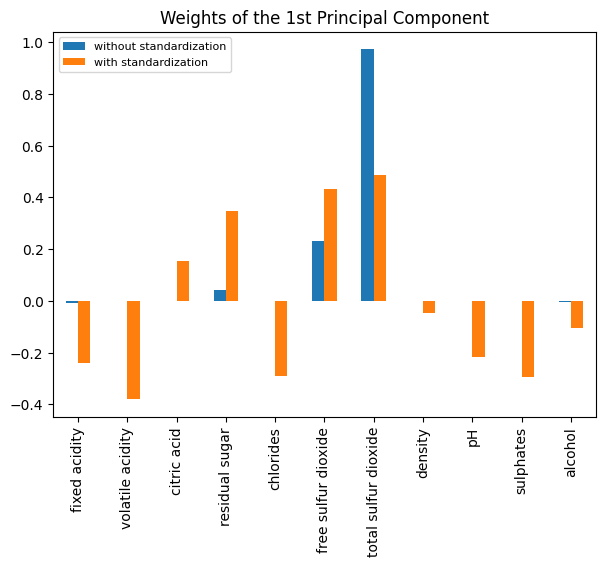

In [39]:
# 第一主成份的權重
first_pca_component = pd.DataFrame(pca.components_[0], index=X.columns, columns=['without standardization'])
first_pca_component['with standardization'] = scaled_pca.components_[0]

# 視覺化 : 第一主成份的權重
first_pca_component.plot.bar(title='Weights of the 1st Principal Component',  figsize=(7, 5))
plt.legend(loc='upper left', fontsize=8)

plt.savefig('weights_of_the_first_PC.png', bbox_inches='tight', format='png')

plt.show()

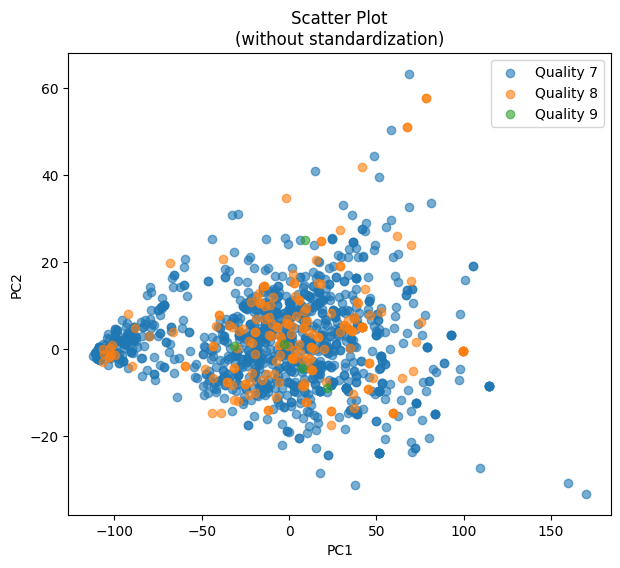

In [58]:
plt.figure(figsize=(7, 6))
for quality_class in [7, 8, 9]:
    plt.scatter(x=X_transformed[y==quality_class, 0],
                y=X_transformed[y==quality_class, 1],
                alpha=0.6, label=f'Quality {quality_class}')
    plt.legend(loc='upper right')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot\n(without standardization)')

plt.savefig('scatter_plot_without_standardization.png', bbox_inches='tight', format='png')

plt.show()

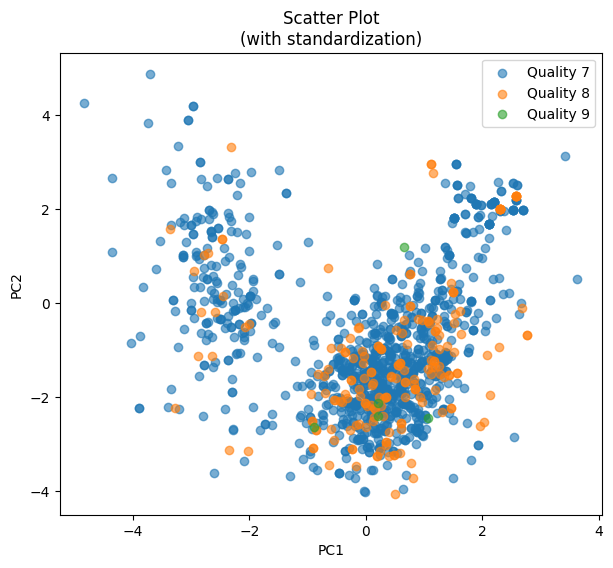

In [59]:
plt.figure(figsize=(7, 6))
for quality_class in [7, 8, 9]:
    plt.scatter(x=X_std_transformed[y==quality_class, 0],
                y=X_std_transformed[y==quality_class, 1],
                alpha=0.6, label=f'Quality {quality_class}')
    plt.legend(loc='upper right')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot\n(with standardization)')

plt.savefig('scatter_plot_with_standardization.png', bbox_inches='tight', format='png')

plt.show()